## Importing the libraries

In [1]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 89.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 34.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

## Importing the dataset

In [2]:
df= pd.read_csv("adult.data",sep=' ',names= ['age','workclass','fnlwgt','education','education_num','marital_status','occupation',
            'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','high_income'])

In [3]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,"27,","Private,","257302,","Assoc-acdm,","12,","Married-civ-spouse,","Tech-support,","Wife,","White,","Female,","0,","0,","38,","United-States,",<=50K
32557,"40,","Private,","154374,","HS-grad,","9,","Married-civ-spouse,","Machine-op-inspct,","Husband,","White,","Male,","0,","0,","40,","United-States,",>50K
32558,"58,","Private,","151910,","HS-grad,","9,","Widowed,","Adm-clerical,","Unmarried,","White,","Female,","0,","0,","40,","United-States,",<=50K
32559,"22,","Private,","201490,","HS-grad,","9,","Never-married,","Adm-clerical,","Own-child,","White,","Male,","0,","0,","20,","United-States,",<=50K


In [4]:
df_train=df.drop("high_income",axis=1)
output_col=pd.DataFrame(df['high_income'])

In [5]:
output_col

,high_income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


## Cleaning the dataset

In [6]:
label_mapper={'<=50K':0,'>50K':1}
output_col['high_income']=output_col['high_income'].map(label_mapper)


In [7]:
output_col


,high_income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [8]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,"
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,"
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,"
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,"
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,"27,","Private,","257302,","Assoc-acdm,","12,","Married-civ-spouse,","Tech-support,","Wife,","White,","Female,","0,","0,","38,","United-States,"
32557,"40,","Private,","154374,","HS-grad,","9,","Married-civ-spouse,","Machine-op-inspct,","Husband,","White,","Male,","0,","0,","40,","United-States,"
32558,"58,","Private,","151910,","HS-grad,","9,","Widowed,","Adm-clerical,","Unmarried,","White,","Female,","0,","0,","40,","United-States,"
32559,"22,","Private,","201490,","HS-grad,","9,","Never-married,","Adm-clerical,","Own-child,","White,","Male,","0,","0,","20,","United-States,"


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education_num   32561 non-null  object
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  object
 11  capital_loss    32561 non-null  object
 12  hours_per_week  32561 non-null  object
 13  native_country  32561 non-null  object
dtypes: object(14)
memory usage: 3.5+ MB


In [10]:
for col in df_train.columns:
    has_comma=False
    for val in df_train[col]:
        if "," in val:
            has_comma=True
            break
    print(col," has comma")
            

age  has comma
workclass  has comma
fnlwgt  has comma
education  has comma
education_num  has comma
marital_status  has comma
occupation  has comma
relationship  has comma
race  has comma
sex  has comma
capital_gain  has comma
capital_loss  has comma
hours_per_week  has comma
native_country  has comma


In [11]:
def remove_extra_commas(value):
    if value.endswith(','):
        return value[:-1]  # Remove the last character (comma)
    else:
        return value  # No change if no extra comma
for col in df_train.columns:
    df_train[col] = df_train[col].apply(remove_extra_commas)


In [12]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education_num   32561 non-null  object
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  object
 11  capital_loss    32561 non-null  object
 12  hours_per_week  32561 non-null  object
 13  native_country  32561 non-null  object
dtypes: object(14)
memory usage: 3.5+ MB


Since some columns are of number types also so we will convert them.

In [14]:
update_cols=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
for col in update_cols:
    df_train[col]=df_train[col].astype("float")
    

In [15]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
dtypes: float64(6), object(8)
memory usage: 3.5+ MB


In [17]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [18]:
numerical_columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [19]:
for col in categorical_columns:
    # print(df_train[col].value_counts())
    print(col)
    categories=list(df_train[col].value_counts().index)
    for cats in categories:
        
        print(cats,"__")
    print()
    

workclass
Private __
Self-emp-not-inc __
Local-gov __
? __
State-gov __
Self-emp-inc __
Federal-gov __
Without-pay __
Never-worked __

education
HS-grad __
Some-college __
Bachelors __
Masters __
Assoc-voc __
11th __
Assoc-acdm __
10th __
7th-8th __
Prof-school __
9th __
12th __
Doctorate __
5th-6th __
1st-4th __
Preschool __

marital_status
Married-civ-spouse __
Never-married __
Divorced __
Separated __
Widowed __
Married-spouse-absent __
Married-AF-spouse __

occupation
Prof-specialty __
Craft-repair __
Exec-managerial __
Adm-clerical __
Sales __
Other-service __
Machine-op-inspct __
? __
Transport-moving __
Handlers-cleaners __
Farming-fishing __
Tech-support __
Protective-serv __
Priv-house-serv __
Armed-Forces __

relationship
Husband __
Not-in-family __
Own-child __
Unmarried __
Wife __
Other-relative __

race
White __
Black __
Asian-Pac-Islander __
Amer-Indian-Eskimo __
Other __

sex
Male __
Female __

native_country
United-States __
Mexico __
? __
Philippines __
Germany __
Cana

In [20]:
# For the category "?" in some columns we impute them with np.nan values
for col in categorical_columns:
    if "?" in set(df_train[col].value_counts().index) :
        df_train[col]=np.where(df_train[col]=="?","Undefined",df_train[col])

In [21]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


## Exploratory Data Analysis

### 1. First step is to see the type of columns so that we could conclude that even now some columns needs to be appropriated.

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
dtypes: float64(6), object(8)
memory usage: 3.5+ MB


In [23]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


### 2. NULL Values . First step is to see the Null Values

In [24]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

<Axes: >

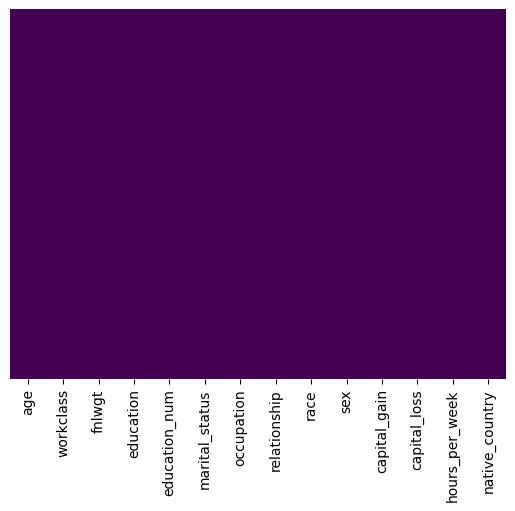

In [25]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###  3. Next step is to see the collinearity. We will use the spearman correlation since even if the dataset is spreaded we can see the correlation very easily. We will also use the Variable Inflation Factor to see the that whether a independent column could be predicted using other independednt columns

In [26]:
pd.concat([df_train,output_col],axis=1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


In [27]:
pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,high_income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0,0
32557,40.0,154374.0,9.0,0.0,0.0,40.0,1
32558,58.0,151910.0,9.0,0.0,0.0,40.0,0
32559,22.0,201490.0,9.0,0.0,0.0,20.0,0


In [28]:
pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,high_income
age,1.000000,-0.078141,0.066345,0.124948,0.058484,0.142907,0.272962
fnlwgt,-0.078141,1.000000,-0.035706,-0.006039,-0.006914,-0.021621,-0.010738
education_num,0.066345,-0.035706,1.000000,0.119140,0.074749,0.167215,0.329682
capital_gain,0.124948,-0.006039,0.119140,1.000000,-0.066569,0.093322,0.278159
capital_loss,0.058484,-0.006914,0.074749,-0.066569,1.000000,0.059852,0.141042
hours_per_week,0.142907,-0.021621,0.167215,0.093322,0.059852,1.000000,0.269075
high_income,0.272962,-0.010738,0.329682,0.278159,0.141042,0.269075,1.000000


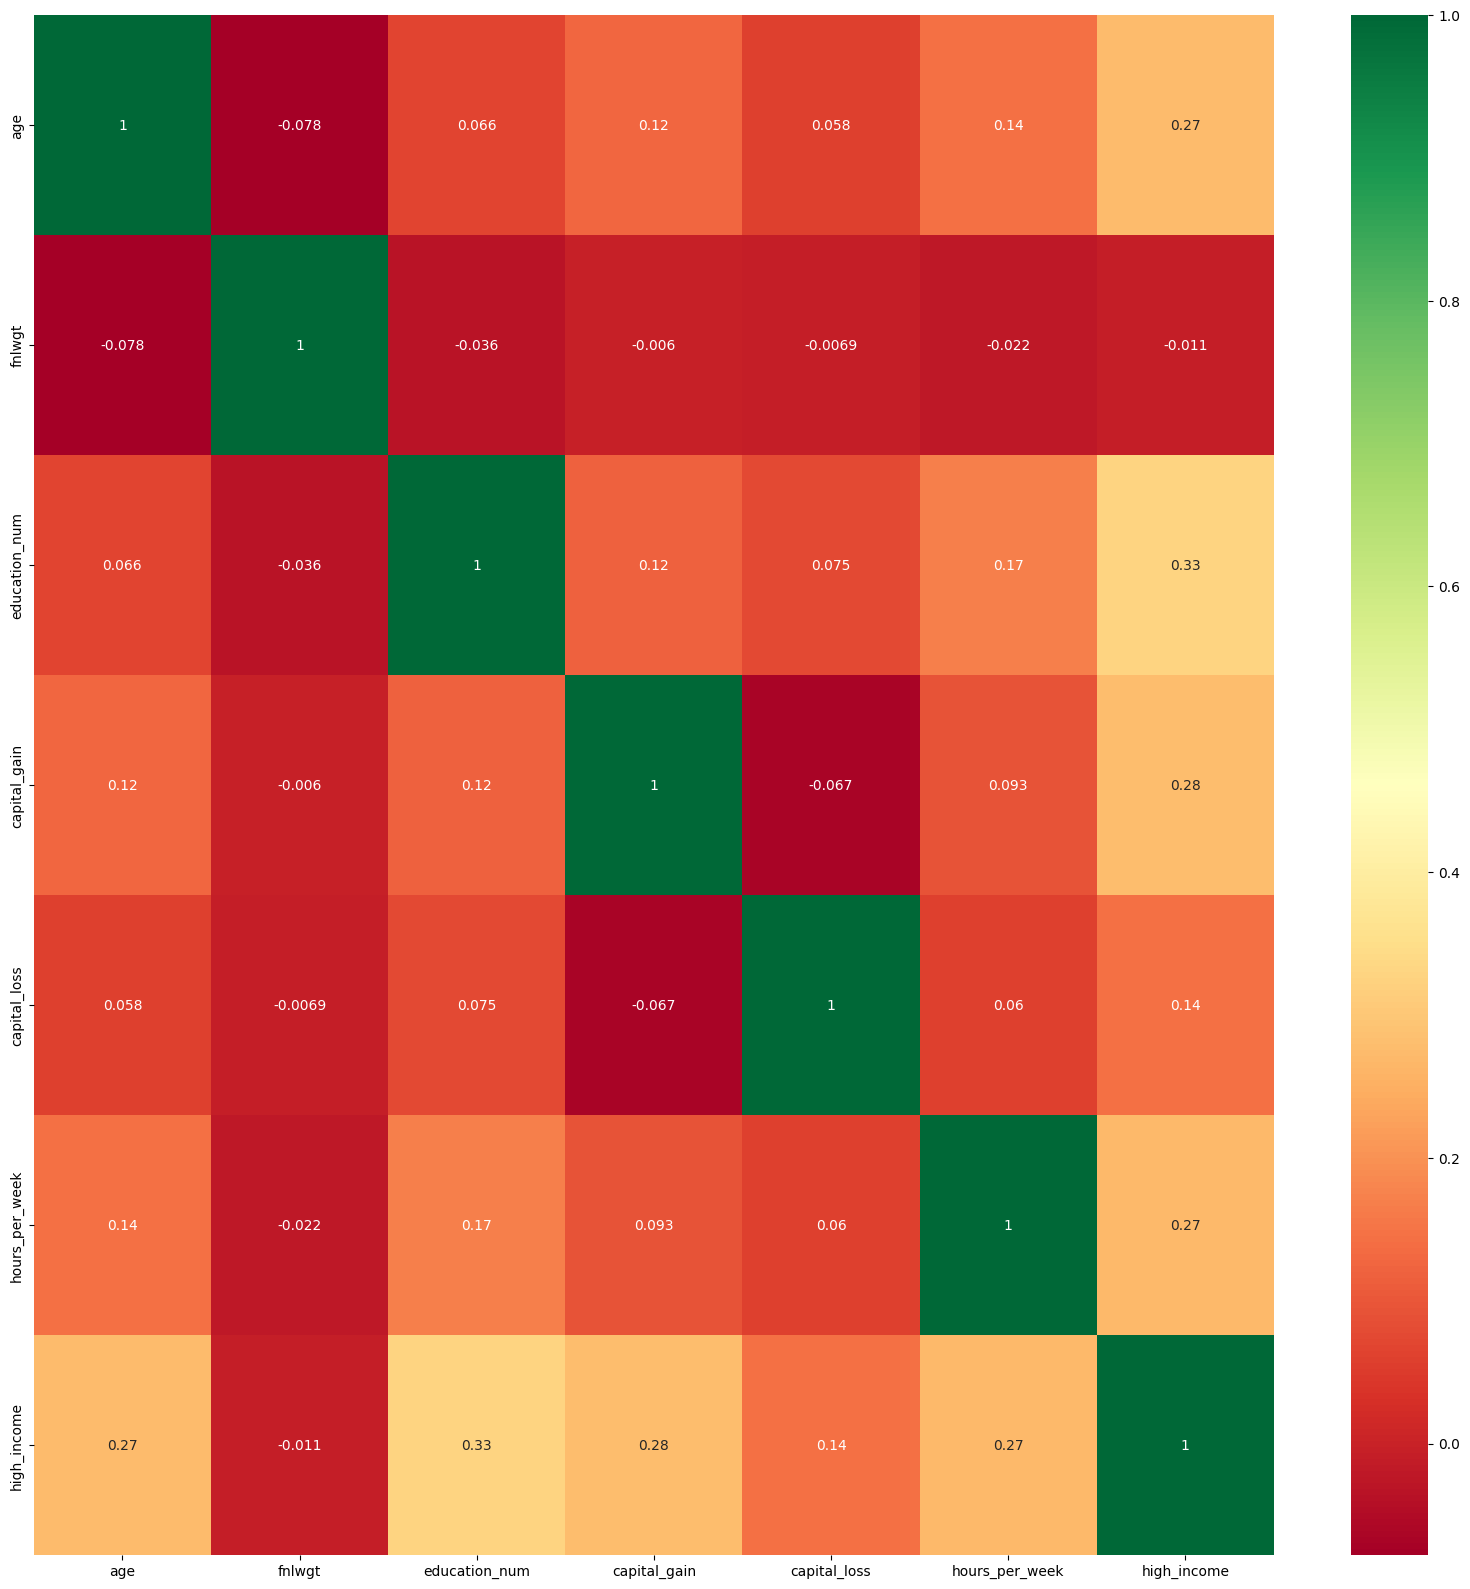

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [30]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
calc_vif(X)

,Variables,VIF
0,age,7.246475
1,fnlwgt,3.683144
2,education_num,10.983289
3,capital_gain,1.032987
4,capital_loss,1.056815
5,hours_per_week,9.758094


### 4. Next step is to see the outliers.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

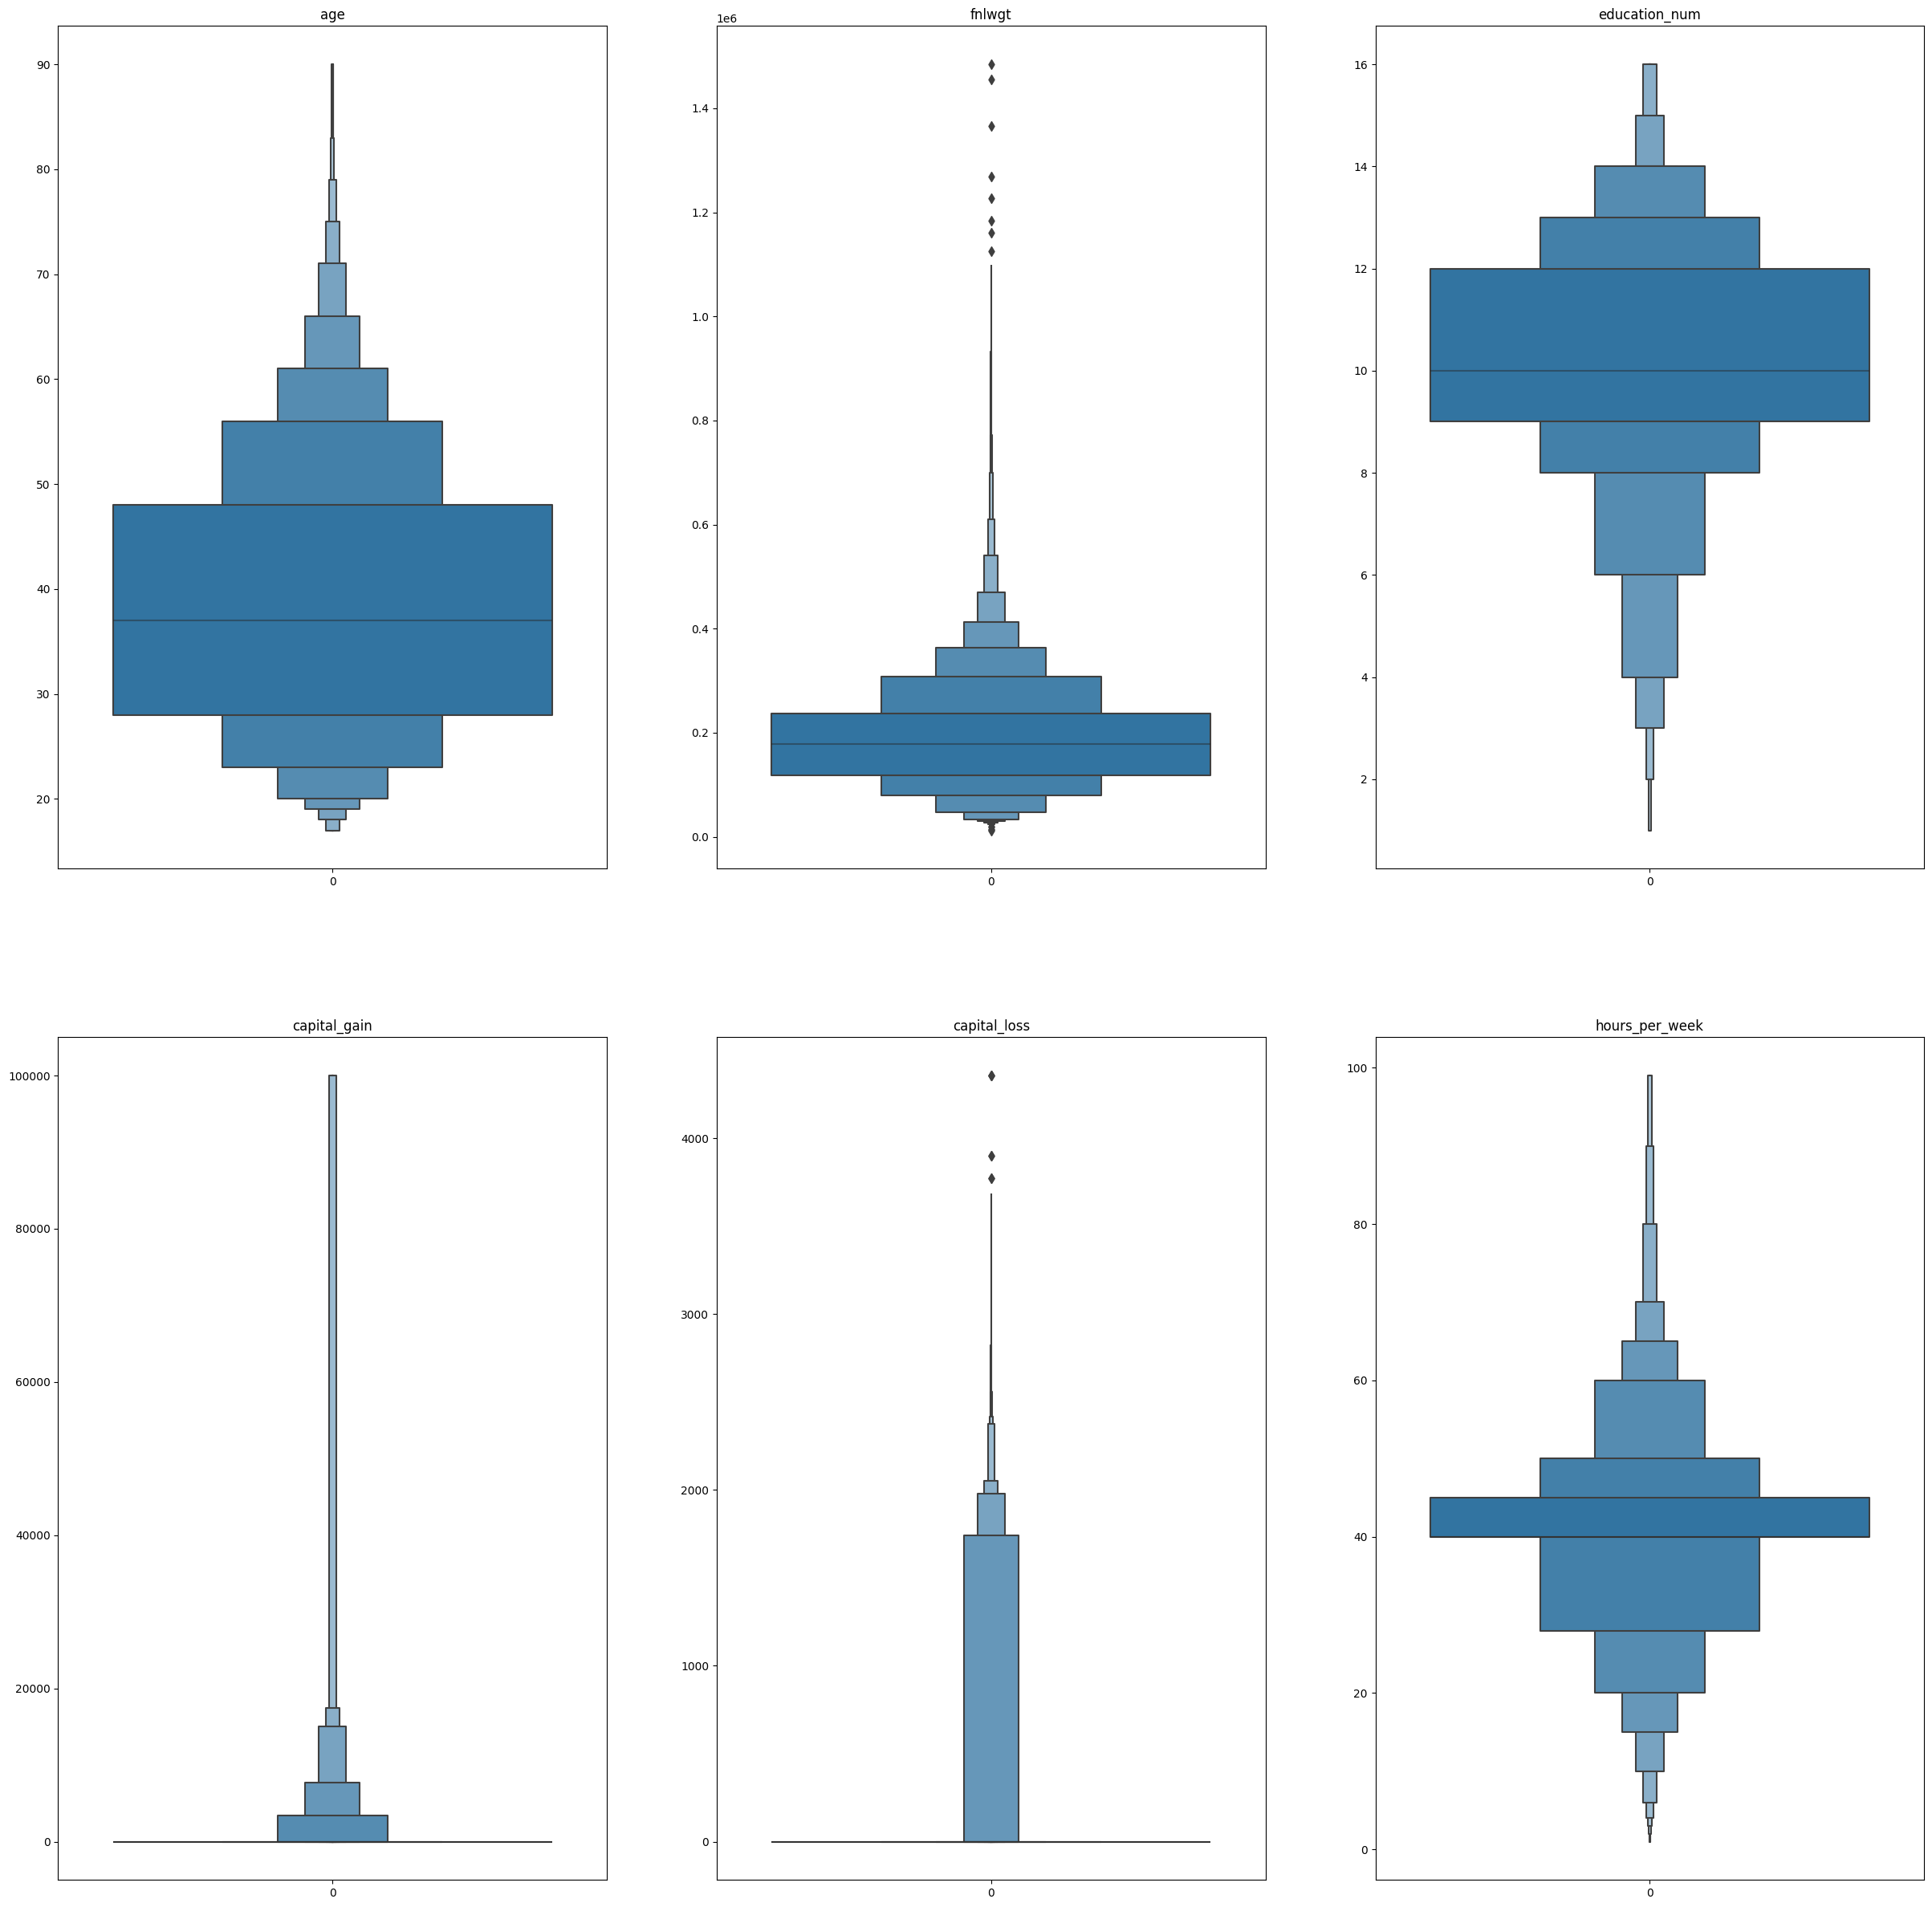

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.boxenplot(df_train[col], ax = ax)
    ax.set_title(col)

### 5. Next step is to see the density 

In [32]:
range(len(df_train))

range(0, 32561)

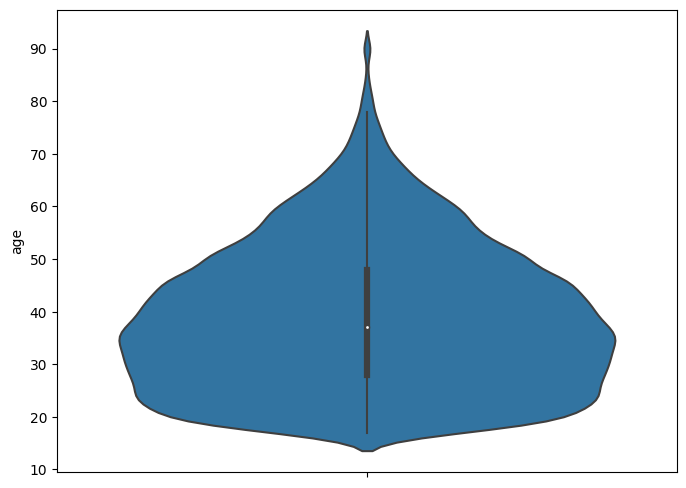

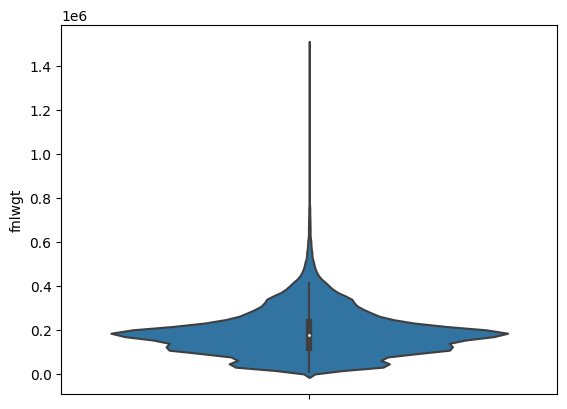

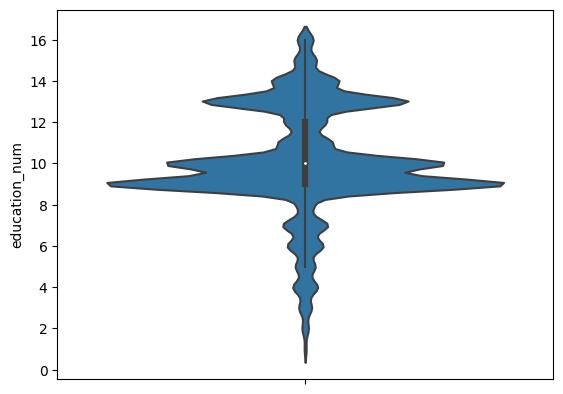

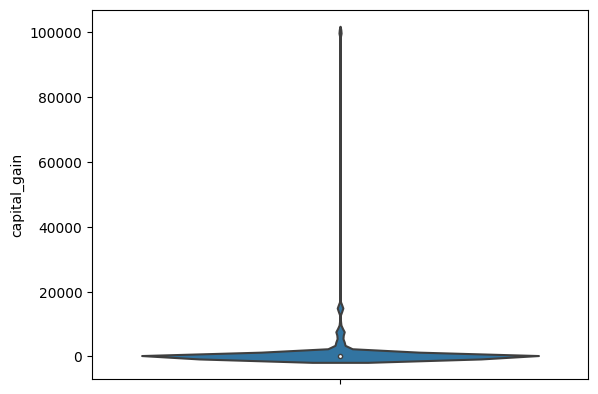

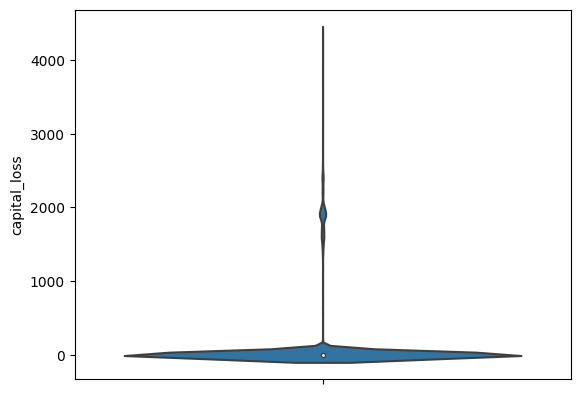

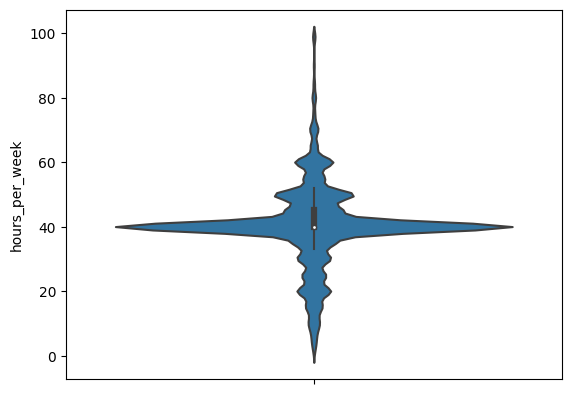

In [33]:
l=[]
for i in range(len(df_train)):
    l.append(i)
# Plot a violin plot for numerical vs categorical
plt.figure(figsize=(8, 6))
for col in numerical_columns:
    sns.violinplot(y=df_train[col])
    plt.show()


### 6. Next step is to see the distribution plot

/tmp/ipykernel_2623/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_2623/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogram

/tmp/ipykernel_2623/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_2623/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogram

/tmp/ipykernel_2623/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_2623/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogram

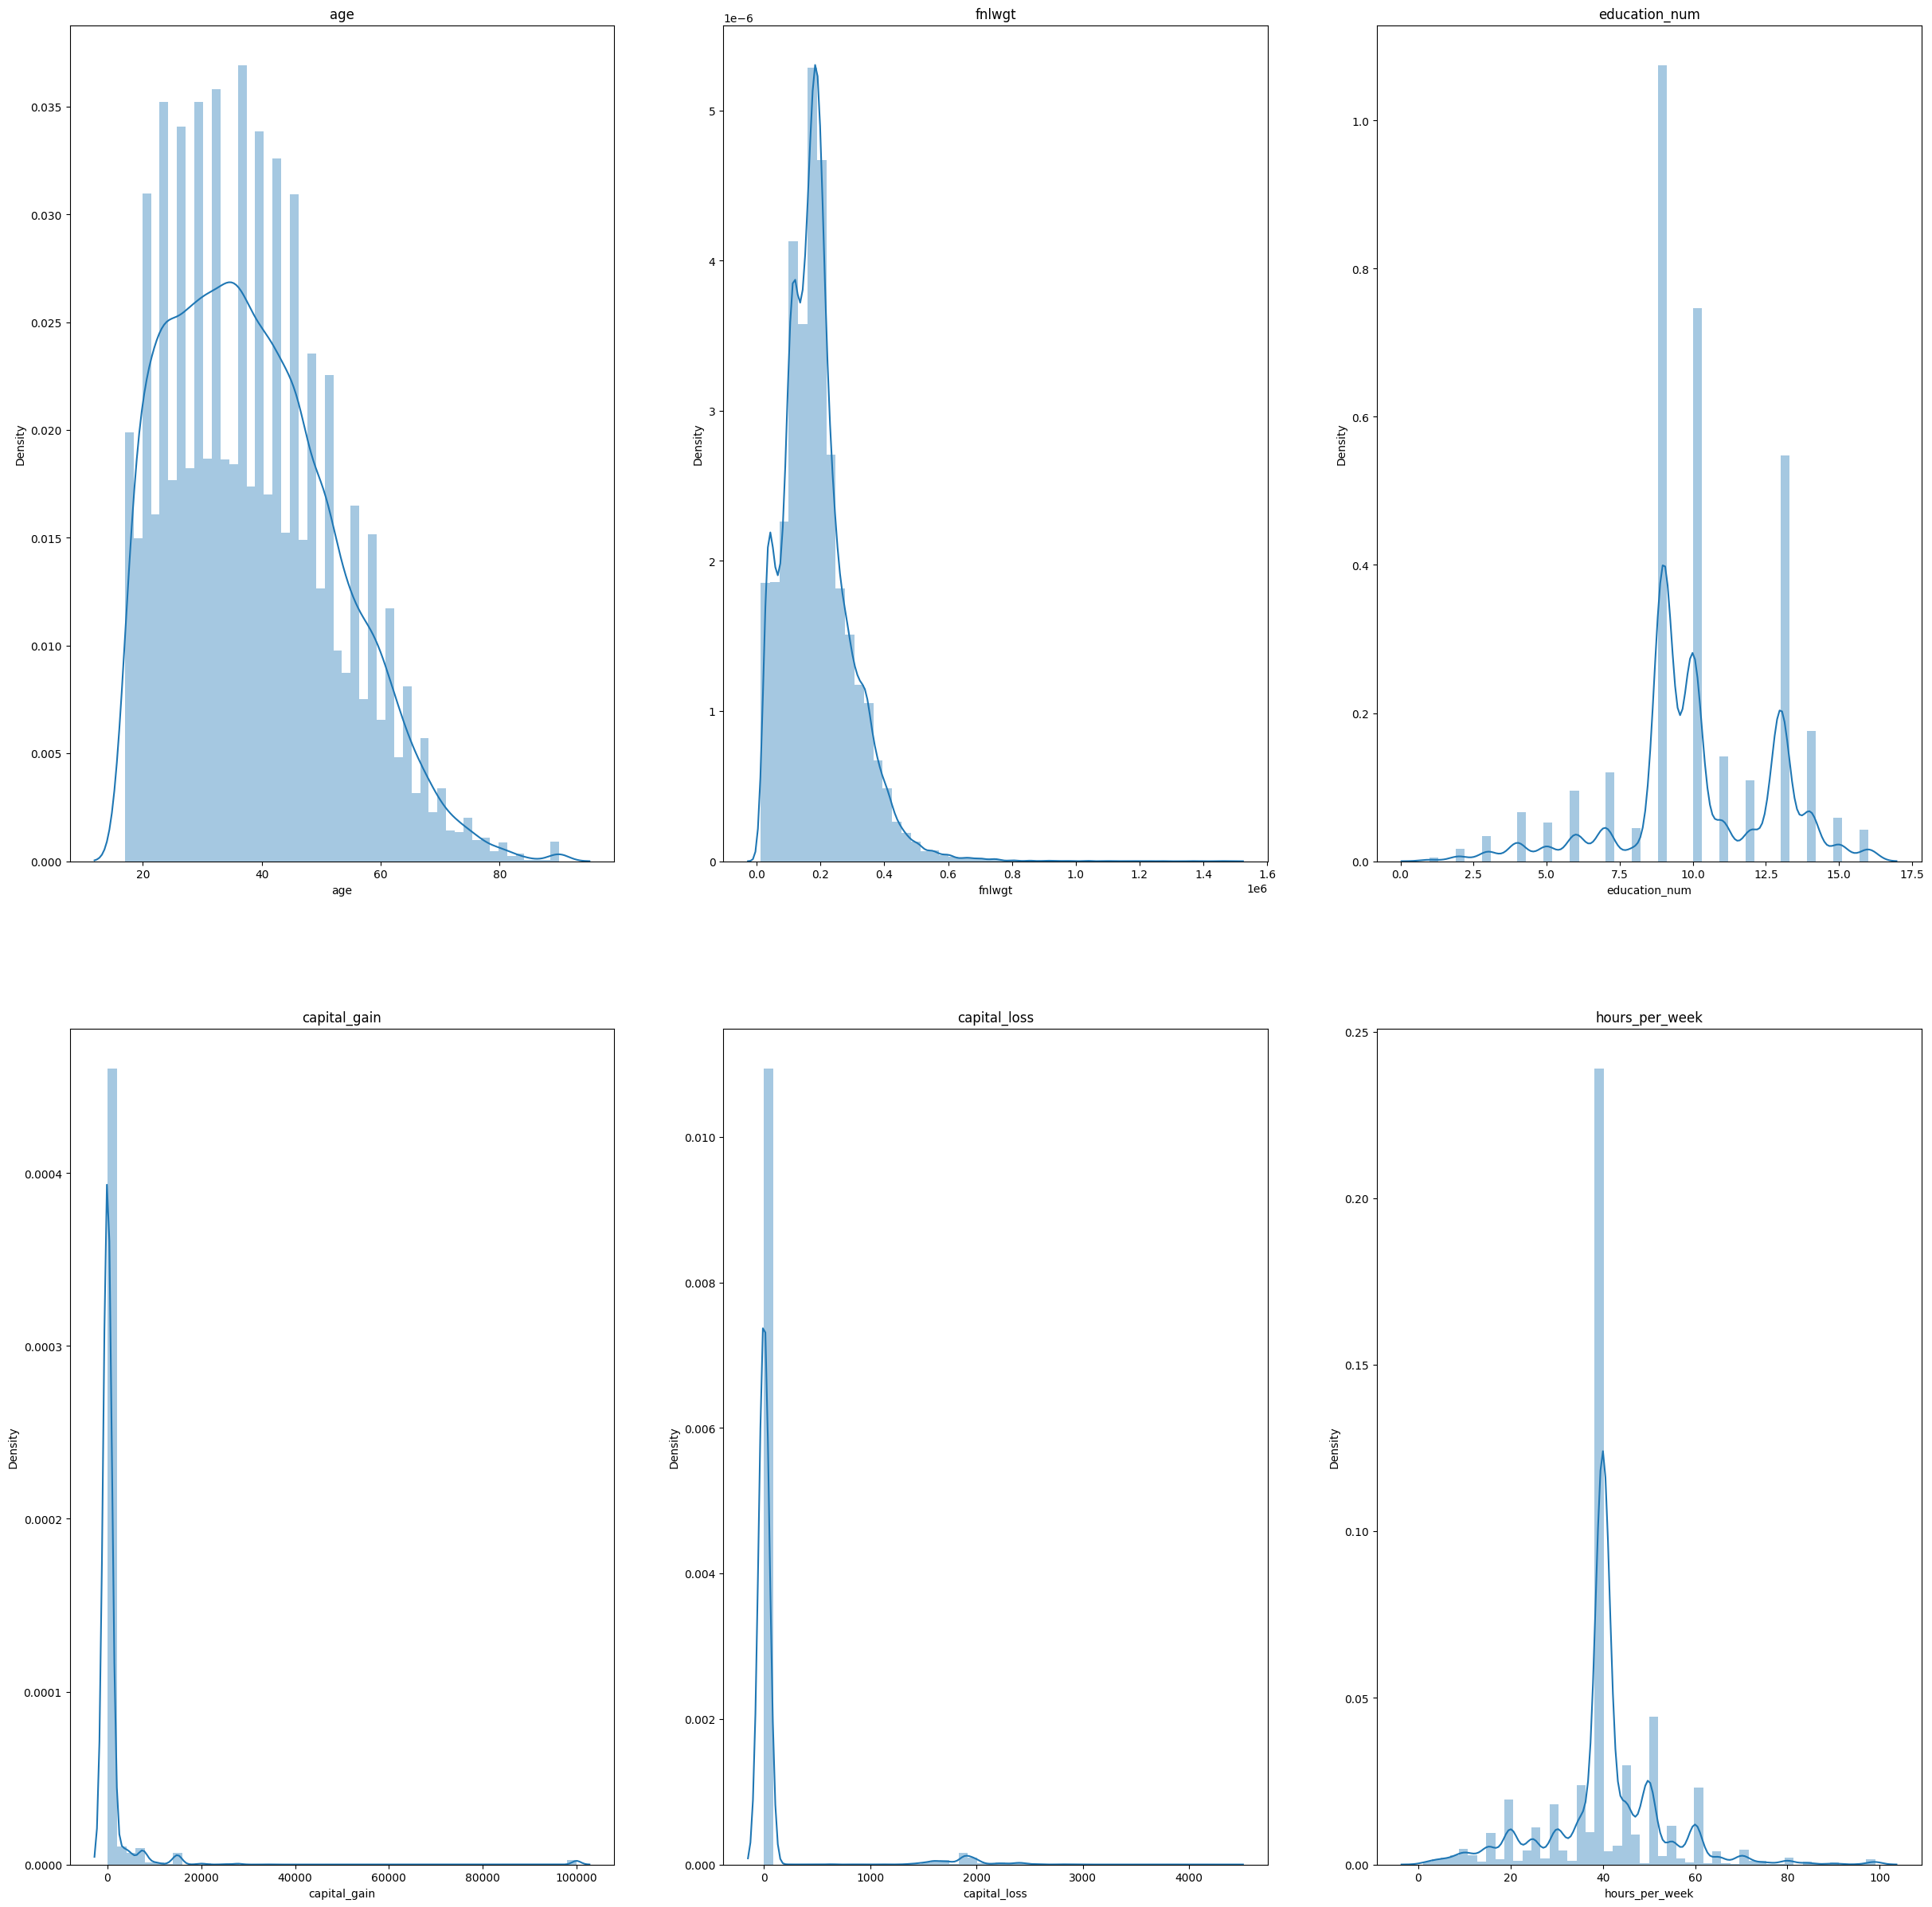

In [34]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

### 7. To get more clearity we also see the skewness in each of the numerical column 

In [35]:
for col in numerical_columns:
    print(f" {df_train[col].skew() } in {col}")

 0.5587433694130484 in age
 1.4469800945789826 in fnlwgt
 -0.3116758679102297 in education_num
 11.953847687699799 in capital_gain
 4.594629121679692 in capital_loss
 0.22764253680450092 in hours_per_week


### 8. Next we see the count plot of each category i.e. basically the countplot

In [36]:
len(categorical_columns)

8

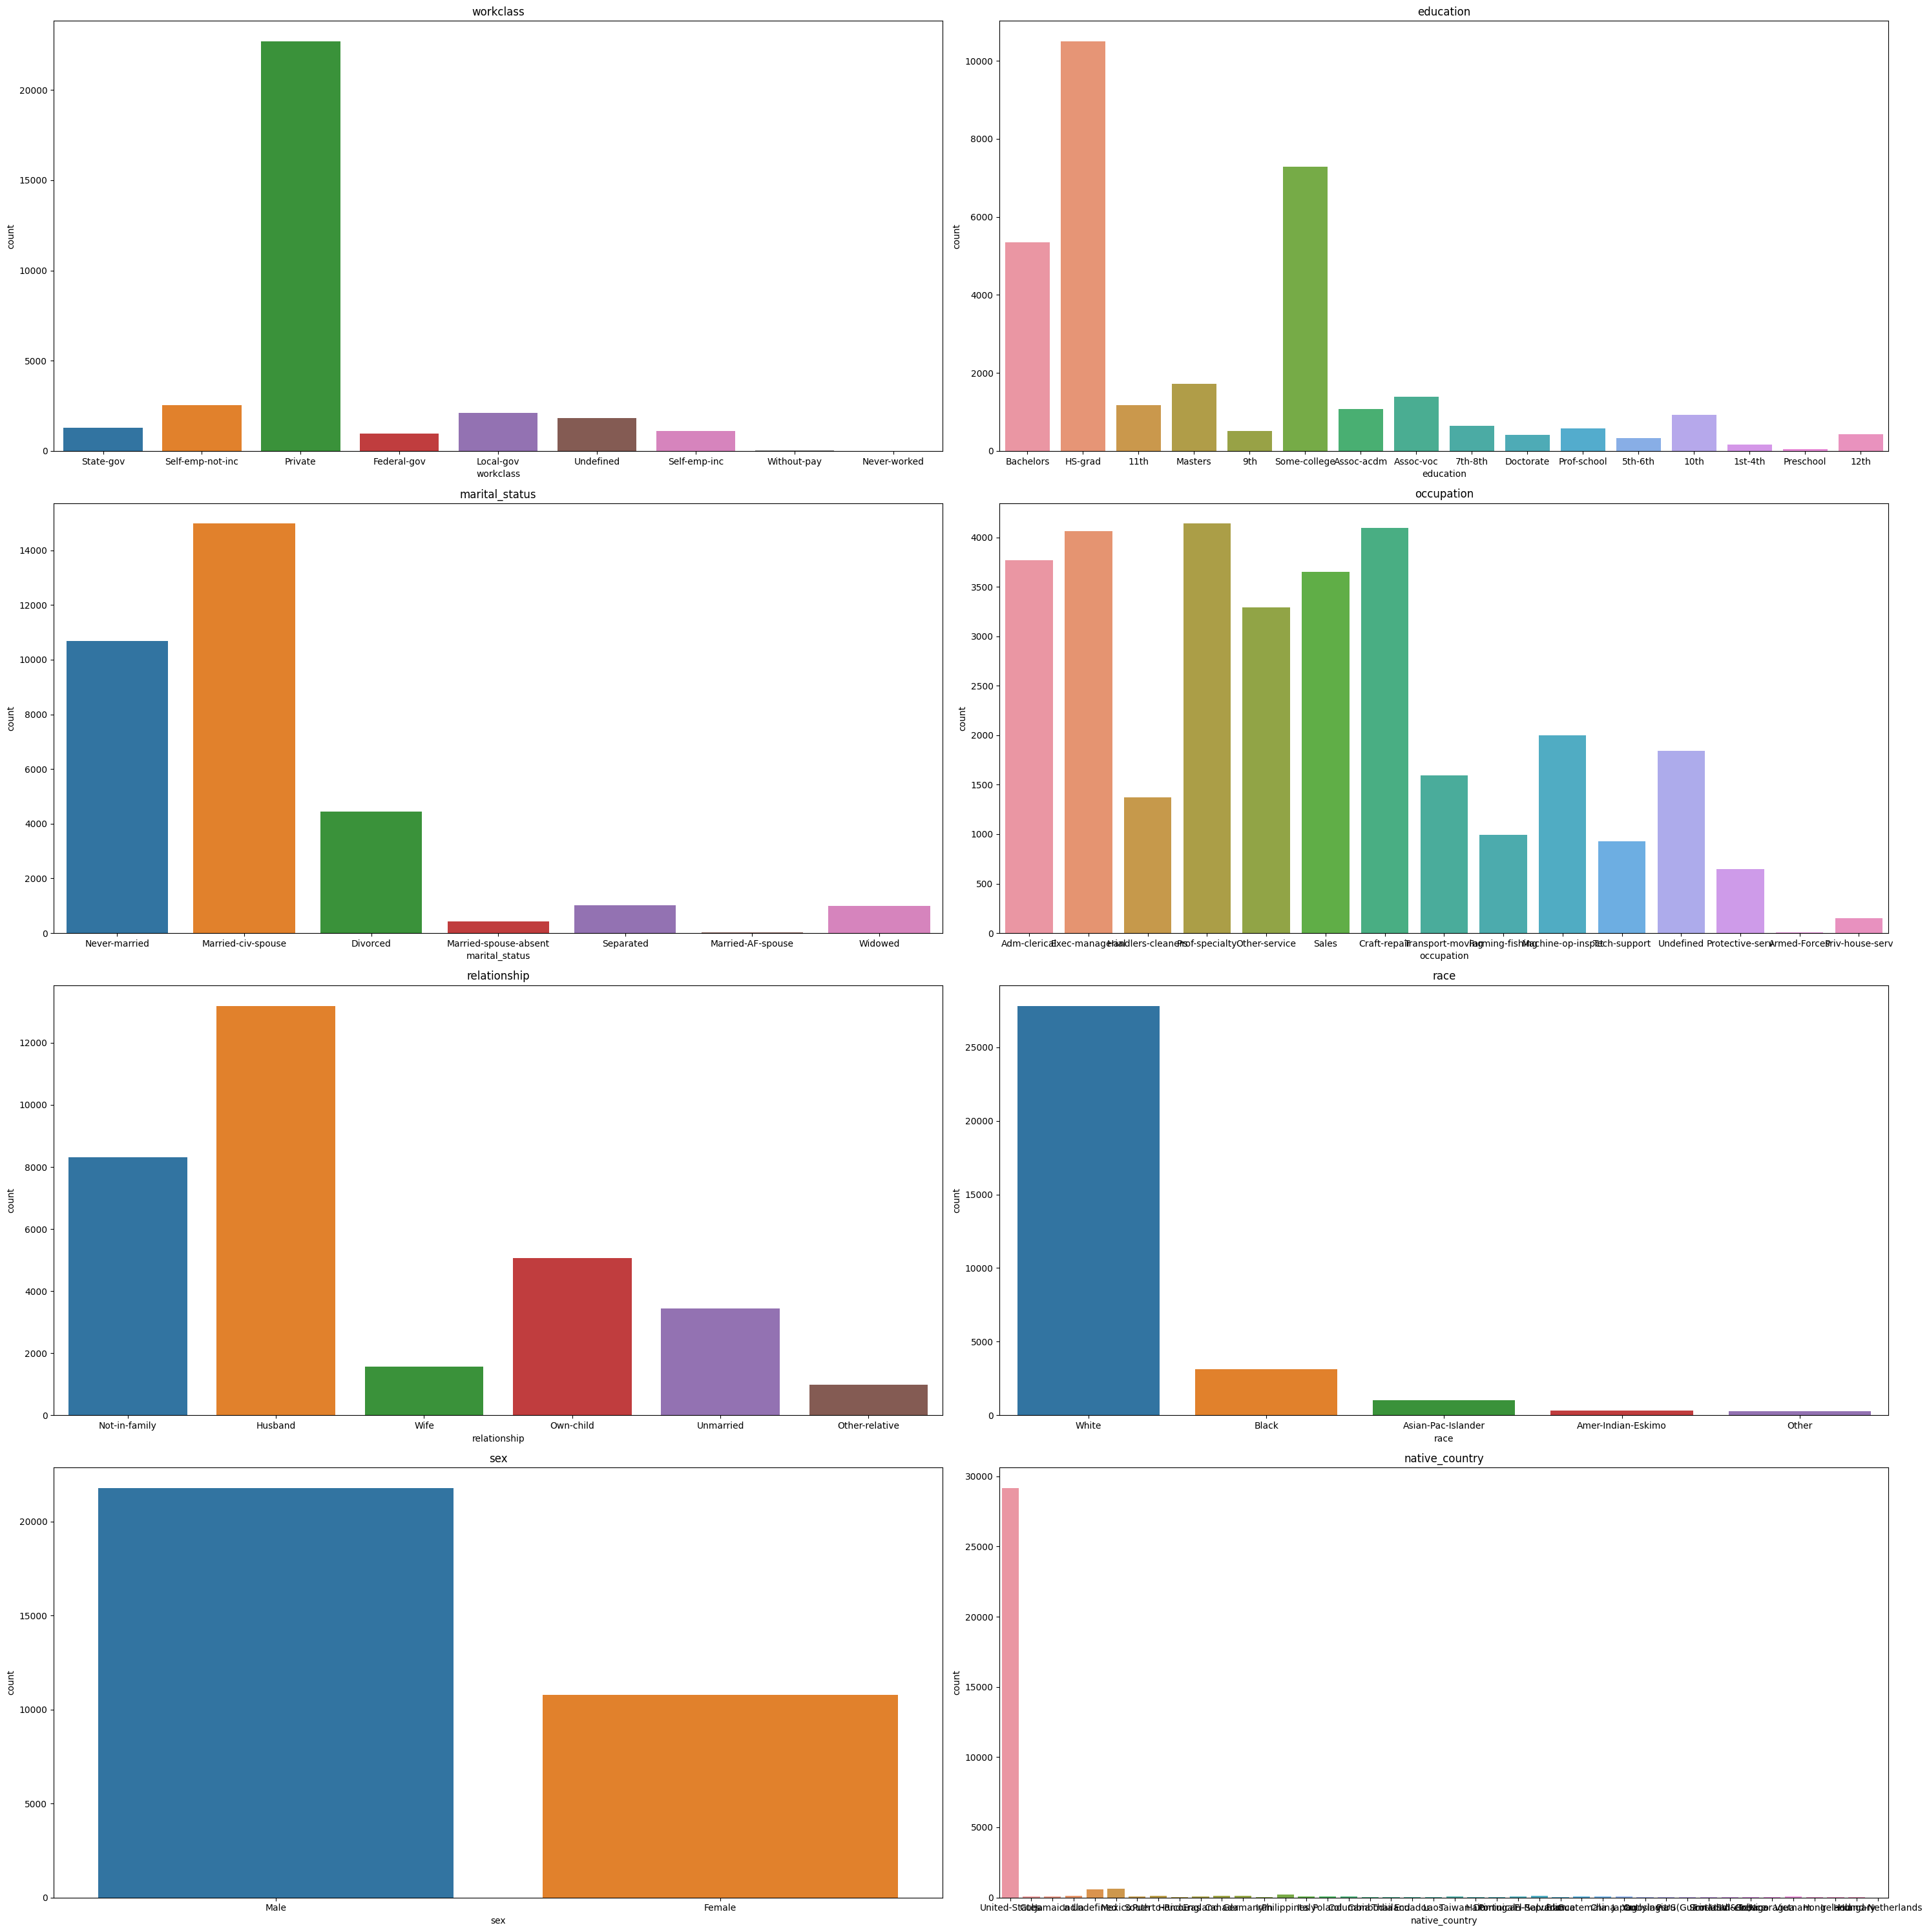

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=2)  # Create subplots
axes = axes.flatten()  # Flatten the axes array to handle individual plots
fig.set_size_inches(30, 30)  # Set the figure size

for ax, col in zip(axes, categorical_columns):
    sns.countplot(x=col, data=df_train, ax=ax)  # Use x=col to specify the column
    ax.set_title(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Text(0.5, 1.0, 'Count of categories in the label')

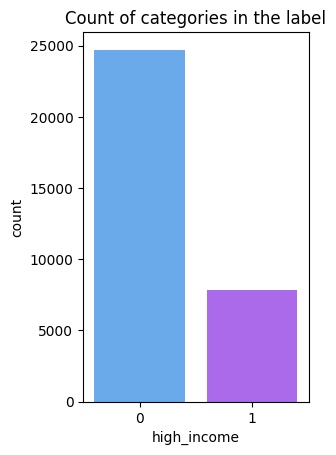

In [38]:
plt.subplot(1,2,1)
sns.countplot(x = 'high_income' , palette= 'cool', data= output_col) 
plt.title("Count of categories in the label")

### 9. See the redundant values in a column

In [39]:
df_train[numerical_columns].describe(percentiles = [.25,.5,.75,.95,.97,.99])  

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
95%,63.000000,3.796820e+05,14.000000,5013.000000,0.000000,60.000000
97%,67.000000,4.168904e+05,15.000000,7688.000000,1848.000000,65.000000
99%,74.000000,5.100720e+05,16.000000,15024.000000,1980.000000,80.000000


## Modification on the basis of EDA

In [40]:
categorical_cols=df_train.select_dtypes(exclude=np.number).columns
numerical_cols=df_train.select_dtypes(include=np.number).columns
numerical_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [41]:
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

### 1.Apropriation

### 2. NULL values

### 3. Removing the most correlated column

In [42]:
df_train.drop(['age','hours_per_week'],axis=1,inplace=True)

In [43]:
calc_vif(df_train.select_dtypes(include=np.number))

,Variables,VIF
0,fnlwgt,3.432454
1,education_num,3.547361
2,capital_gain,1.032406
3,capital_loss,1.055069


### 4. Remove the outliers 

In [44]:
output_col.value_counts()

high_income
0              24720
1               7841
Name: count, dtype: int64

In [45]:
cols=df_train.select_dtypes(include=np.number).columns
for col in cols:
    print(f"Median in {col} col is:")
    print(df_train[col].median())
    print()

Median in fnlwgt col is:
178356.0

Median in education_num col is:
10.0

Median in capital_gain col is:
0.0

Median in capital_loss col is:
0.0



In [46]:
# Outlier imputing by median
cols=df_train.select_dtypes(include=np.number).columns


for col in cols:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("[",l,",",h,"]")
    mode_value=df_train[col].mode().values[0]
        
    df_train[col] = np.where((df_train[col] < l) | (df_train[col] > h), median_value, df_train[col])



[ -61009.0 , 415887.0 ]
[ 4.5 , 16.5 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]


In [47]:
df_train

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country
0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,United-States
1,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,United-States
2,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,United-States
3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,United-States
4,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,United-States
32557,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,United-States
32558,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,United-States
32559,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,United-States


In [48]:
np.unique(output_col)

array([0, 1])

/tmp/ipykernel_2623/2928899459.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_2623/2928899459.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histogram

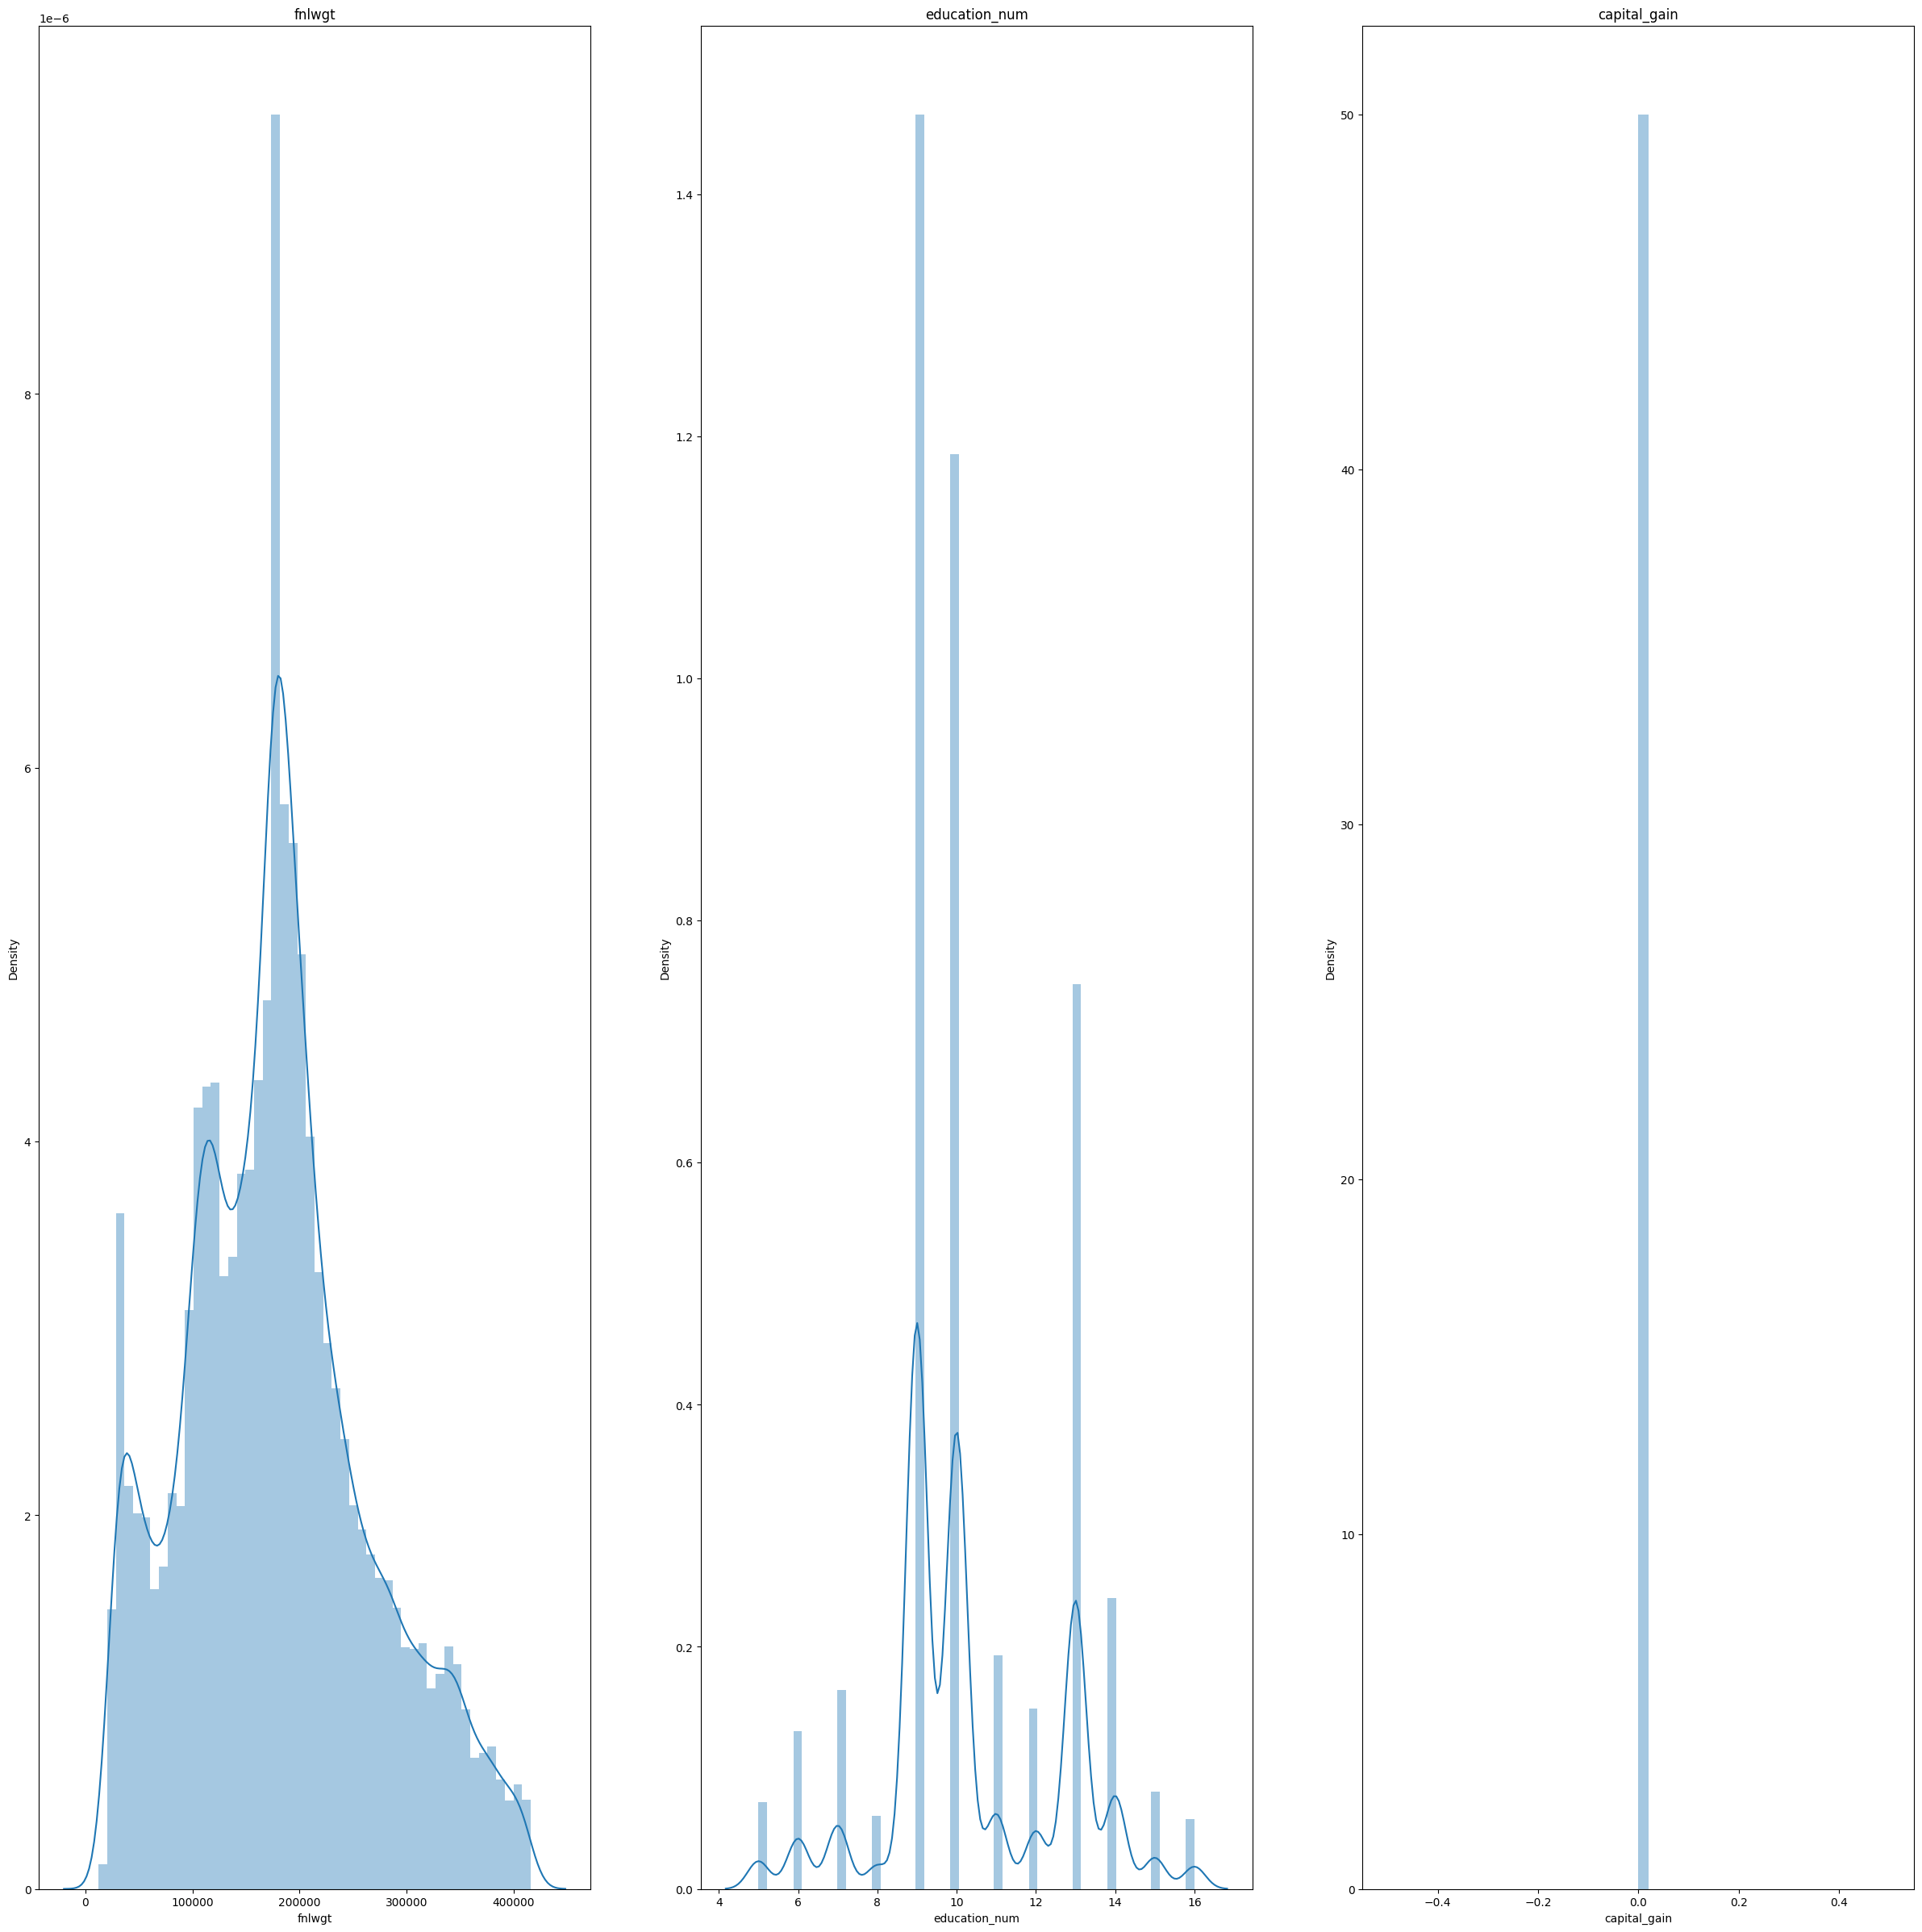

In [49]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)

cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

In [50]:
cols=list(df_train.select_dtypes(include= np.number).columns)
for col in cols:
    print(f" {df_train[col].skew() } in {col}")

 0.41920300445471725 in fnlwgt
 0.2894934518189742 in education_num
 0.0 in capital_gain
 0.0 in capital_loss


## Encoding

In [51]:
def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}

            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        
        df_train=pd.concat([df_train,df_categorical],axis=1)
        
    if strategy=="onehotencoder":
        one_hot_encoded=pd.get_dummies(df_categorical)
        # print(one_hot_encoded)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        df_train=pd.concat([df_train,one_hot_encoded],axis=1)
    return df_train

In [52]:
df_train=encoding_categorical_cols(df_train=df_train,categorical_columns=categorical_columns,strategy="labelencoder")

In [53]:
df_train

,fnlwgt,education_num,capital_gain,capital_loss,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,77516.0,13.0,0.0,0.0,4,2,1,3,1,0,0,0
1,83311.0,13.0,0.0,0.0,1,2,0,2,0,0,0,0
2,215646.0,9.0,0.0,0.0,0,0,2,9,1,0,0,0
3,234721.0,7.0,0.0,0.0,0,5,0,9,0,1,0,0
4,338409.0,13.0,0.0,0.0,0,2,0,0,4,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,257302.0,12.0,0.0,0.0,0,6,0,11,4,0,1,0
32557,154374.0,9.0,0.0,0.0,0,0,0,6,0,0,0,0
32558,151910.0,9.0,0.0,0.0,0,0,4,3,3,0,1,0
32559,201490.0,9.0,0.0,0.0,0,0,1,3,2,0,0,0


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fnlwgt          32561 non-null  float64
 1   education_num   32561 non-null  float64
 2   capital_gain    32561 non-null  float64
 3   capital_loss    32561 non-null  float64
 4   workclass       32561 non-null  int64  
 5   education       32561 non-null  int64  
 6   marital_status  32561 non-null  int64  
 7   occupation      32561 non-null  int64  
 8   relationship    32561 non-null  int64  
 9   race            32561 non-null  int64  
 10  sex             32561 non-null  int64  
 11  native_country  32561 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 3.0 MB


In [55]:
output_col

,high_income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


## Making Model

In [62]:
X=df_train
Y=output_col

In [63]:
np.unique(output_col)

array([0, 1])

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [65]:
X_train.shape,Y_train.shape

((21815, 12), (21815, 1))

In [66]:
def algo_testing(X_train,X_test,Y_train,Y_test,algo:str,evaluation_metric:str,final_accuracies:dict,fbeta:dict):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)   
    model.fit(X_train,Y_train)
    
    
    print("Train Score ",model.score(X_train,Y_train))
    print("Test Score ",model.score(X_test,Y_test))
    final_accuracies[f'{model}']=model.score(X_test,Y_test)
    


    predicted=model.predict(X_test)
    cl=classification_report(y_true=Y_test,y_pred=predicted)
    print(cl)


    
    # accuracy=evaluation_metric(y_true=Y_test, y_pred=predicted)
    precision,recall,fbeta_score,support=precision_recall_fscore_support(y_true=Y_test,y_pred=predicted,labels=[0,1])
    fbeta[f'{model}']=fbeta_score
    print(f"Precision is : {precision}")
    print(f"Recall is : {recall}")
    print(f"FBeta Score is : {fbeta_score}")
    print(f"Support is : {support}")
    
    
    
    cm = confusion_matrix(y_true=Y_test, y_pred=predicted, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()

    
    

For LogisticRegression()
Train Score  0.7574604629841852
Test Score  0.7627024008933556
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      8196
           1       0.00      0.00      0.00      2550

    accuracy                           0.76     10746
   macro avg       0.38      0.50      0.43     10746
weighted avg       0.58      0.76      0.66     10746

Precision is : [0.7627024 0.       ]
Recall is : [1. 0.]
FBeta Score is : [0.86537852 0.        ]
Support is : [8196 2550]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precisio

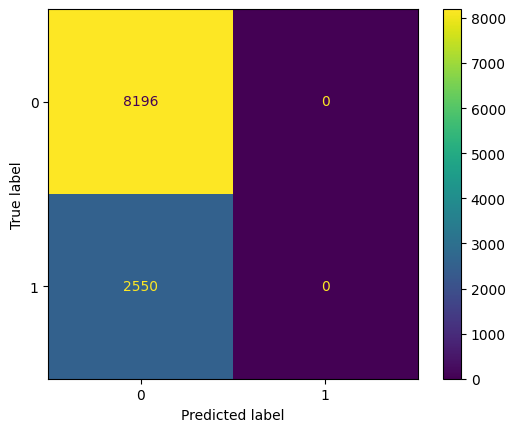


--------------------------------------------------------------------------------

For DecisionTreeClassifier()
Train Score  0.9976163190465276
Test Score  0.7704262050995719
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      8196
           1       0.52      0.51      0.52      2550

    accuracy                           0.77     10746
   macro avg       0.68      0.68      0.68     10746
weighted avg       0.77      0.77      0.77     10746

Precision is : [0.84894628 0.5163579 ]
Recall is : [0.85029283 0.51372549]
FBeta Score is : [0.84961902 0.51503833]
Support is : [8196 2550]


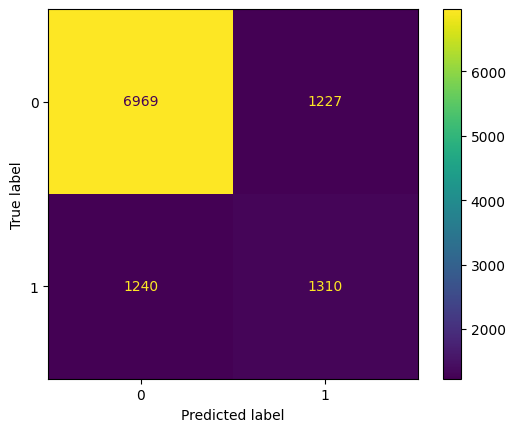


--------------------------------------------------------------------------------

For KNeighborsClassifier()


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score  0.7980288792115516
Test Score  0.724176437744277
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      8196
           1       0.34      0.17      0.23      2550

    accuracy                           0.72     10746
   macro avg       0.56      0.53      0.53     10746
weighted avg       0.67      0.72      0.69     10746

Precision is : [0.77711864 0.34150077]
Recall is : [0.89507077 0.17490196]
FBeta Score is : [0.83193468 0.2313278 ]
Support is : [8196 2550]


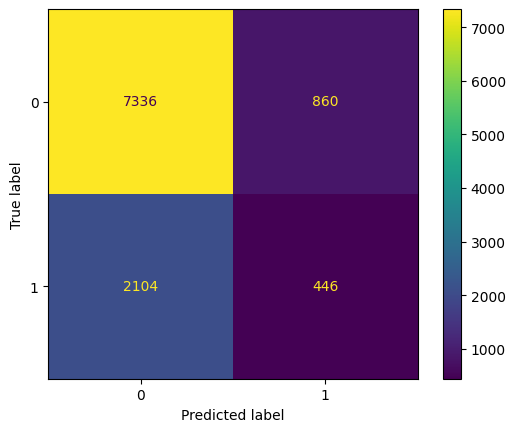


--------------------------------------------------------------------------------

For RandomForestClassifier()


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Score  0.9975704790281916
Test Score  0.7957379490042806
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      8196
           1       0.58      0.51      0.54      2550

    accuracy                           0.80     10746
   macro avg       0.72      0.70      0.71     10746
weighted avg       0.79      0.80      0.79     10746

Precision is : [0.85287546 0.57913509]
Recall is : [0.88482186 0.50941176]
FBeta Score is : [0.868555   0.54204048]
Support is : [8196 2550]


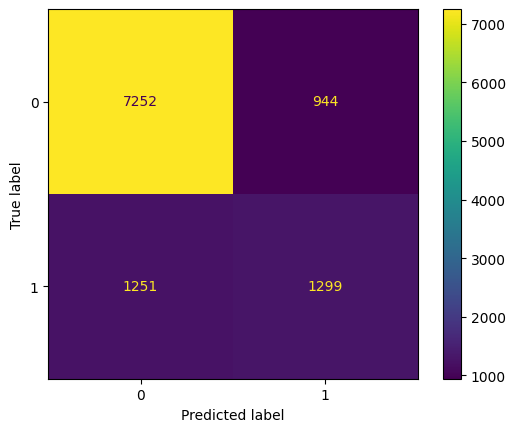


--------------------------------------------------------------------------------

For SGDClassifier()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score  0.2425395370158148
Test Score  0.23729759910664433
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8196
           1       0.24      1.00      0.38      2550

    accuracy                           0.24     10746
   macro avg       0.12      0.50      0.19     10746
weighted avg       0.06      0.24      0.09     10746

Precision is : [0.        0.2372976]
Recall is : [0. 1.]
FBeta Score is : [0.         0.38357401]
Support is : [8196 2550]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

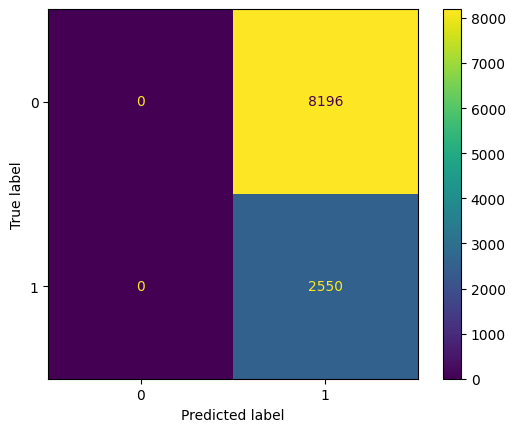


--------------------------------------------------------------------------------

For RidgeClassifierCV()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score  0.8092138436855375
Test Score  0.8163037409268565
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8196
           1       0.73      0.36      0.48      2550

    accuracy                           0.82     10746
   macro avg       0.78      0.66      0.68     10746
weighted avg       0.80      0.82      0.79     10746

Precision is : [0.82712934 0.73300971]
Recall is : [0.95973646 0.35529412]
FBeta Score is : [0.88851237 0.47860539]
Support is : [8196 2550]


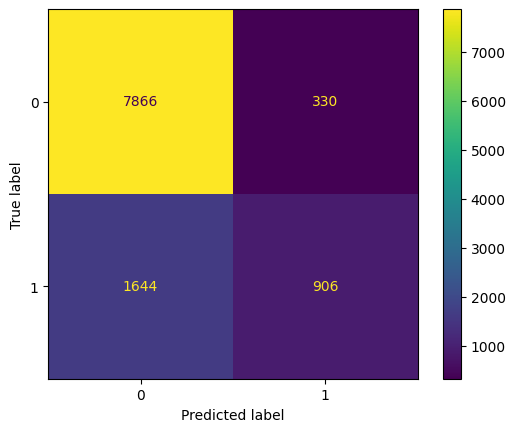


--------------------------------------------------------------------------------

For GaussianNB()
Train Score  0.7730460692184277
Test Score  0.775823562255723
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      8196
           1       0.79      0.08      0.14      2550

    accuracy                           0.78     10746
   macro avg       0.78      0.53      0.50     10746
weighted avg       0.78      0.78      0.70     10746

Precision is : [0.77549272 0.79012346]
Recall is : [0.99377745 0.07529412]
FBeta Score is : [0.87116958 0.13748657]
Support is : [8196 2550]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


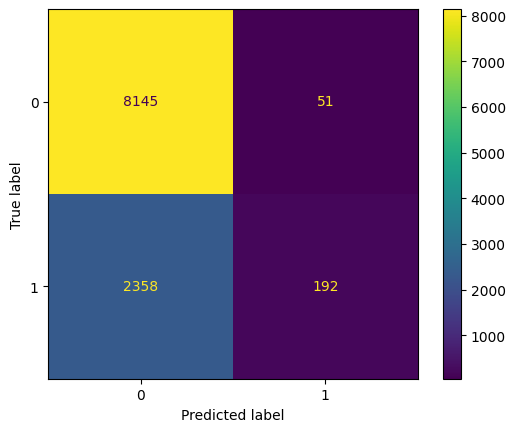


--------------------------------------------------------------------------------

All Completed


In [67]:
algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()","KNeighborsClassifier()","RandomForestClassifier()","SGDClassifier()","RidgeClassifierCV()","GaussianNB()"]
final_accuracies={}
fbeta={}
for algo in algorithms_to_be_tested:
    print(f"For {algo}")
    
    algo_testing(algo=algo,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test,evaluation_metric="accuracy_score",final_accuracies=final_accuracies,fbeta=fbeta)
    print()
    print("-"*80)
    print()
print("All Completed")

In [68]:
final_accuracies

{'LogisticRegression()': 0.7627024008933556,
 'DecisionTreeClassifier()': 0.7704262050995719,
 'KNeighborsClassifier()': 0.724176437744277,
 'RandomForestClassifier()': 0.7957379490042806,
 'SGDClassifier()': 0.23729759910664433,
 'RidgeClassifierCV()': 0.8163037409268565,
 'GaussianNB()': 0.775823562255723}

In [69]:
fbeta

{'LogisticRegression()': array([0.86537852, 0.        ]),
 'DecisionTreeClassifier()': array([0.84961902, 0.51503833]),
 'KNeighborsClassifier()': array([0.83193468, 0.2313278 ]),
 'RandomForestClassifier()': array([0.868555  , 0.54204048]),
 'SGDClassifier()': array([0.        , 0.38357401]),
 'RidgeClassifierCV()': array([0.88851237, 0.47860539]),
 'GaussianNB()': array([0.87116958, 0.13748657])}